# Olist Order Payments Dataset Analysis

This notebook provides an analysis of the `olist_order_payments_dataset.csv` dataset from the Brazilian E-Commerce dataset on Kaggle.

**Dataset Link**: [Kaggle - Brazilian E-Commerce](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_payments_dataset.csv)

### Column Descriptions:
- `order_id`: Unique identifier for each order.
- `payment_sequential`: Index of the payment attempt for the order.
- `payment_type`: Method of payment (e.g., credit card, boleto).
- `payment_installments`: Number of installments for the payment.
- `payment_value`: Total amount paid for the order.


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('olist_order_payments_dataset.csv')
df.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


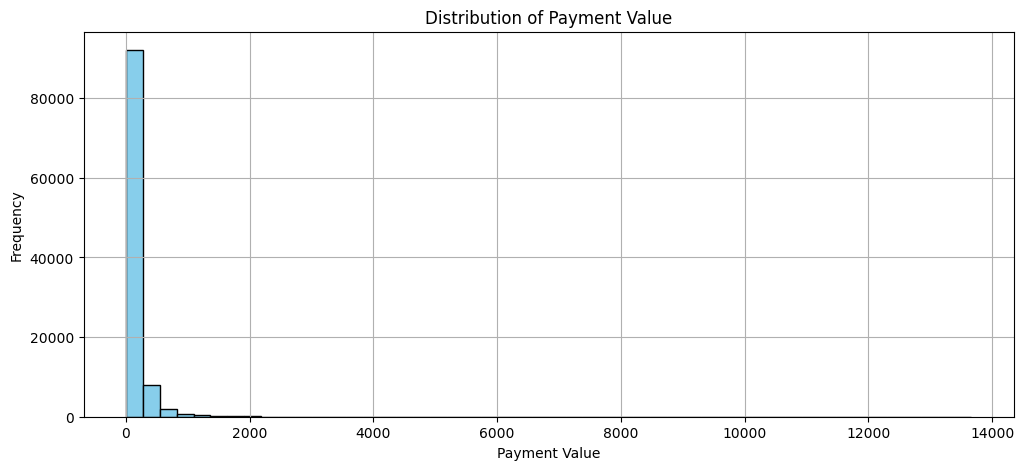

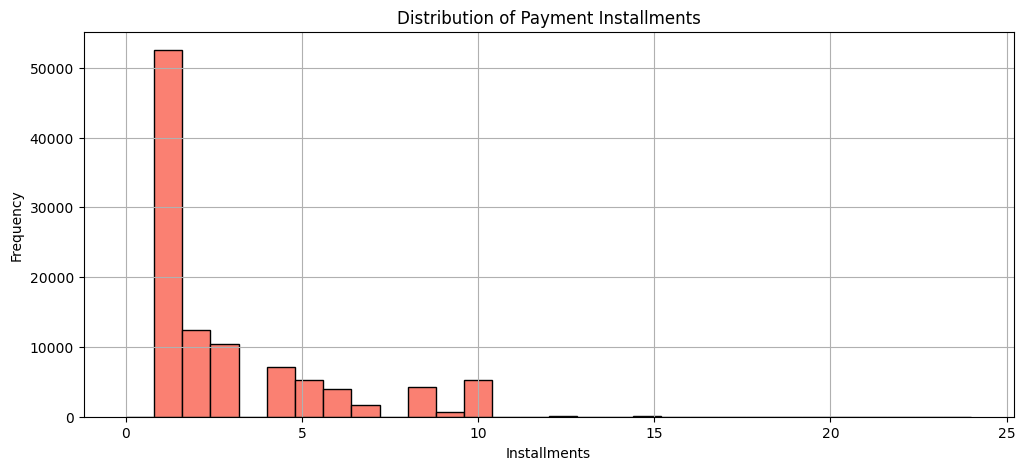

In [19]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('olist_order_payments_dataset.csv')

# Plot distribution of payment_value
plt.figure(figsize=(12, 5))
plt.hist(df['payment_value'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Payment Value')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot distribution of payment_installments
plt.figure(figsize=(12, 5))
plt.hist(df['payment_installments'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Payment Installments')
plt.xlabel('Installments')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


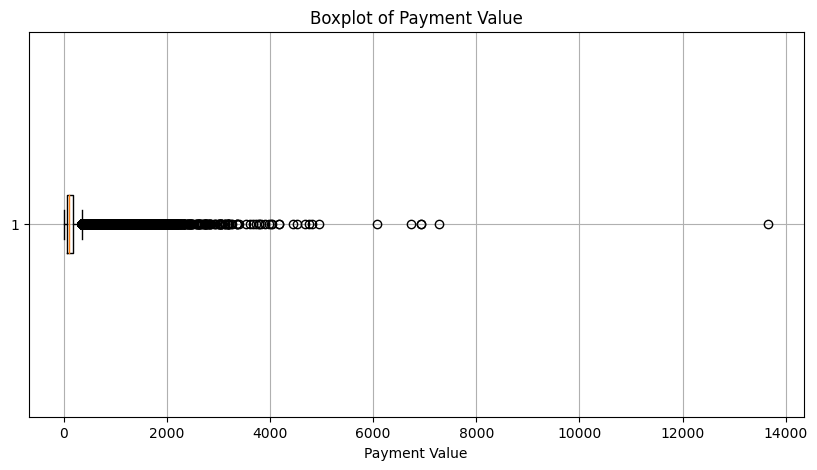

In [26]:
# Boxplot for outlier detection using matplotlib
plt.figure(figsize=(10, 5))
plt.boxplot(df['payment_value'], vert=False)
plt.title('Boxplot of Payment Value')
plt.xlabel('Payment Value')
plt.grid(True)
plt.show()


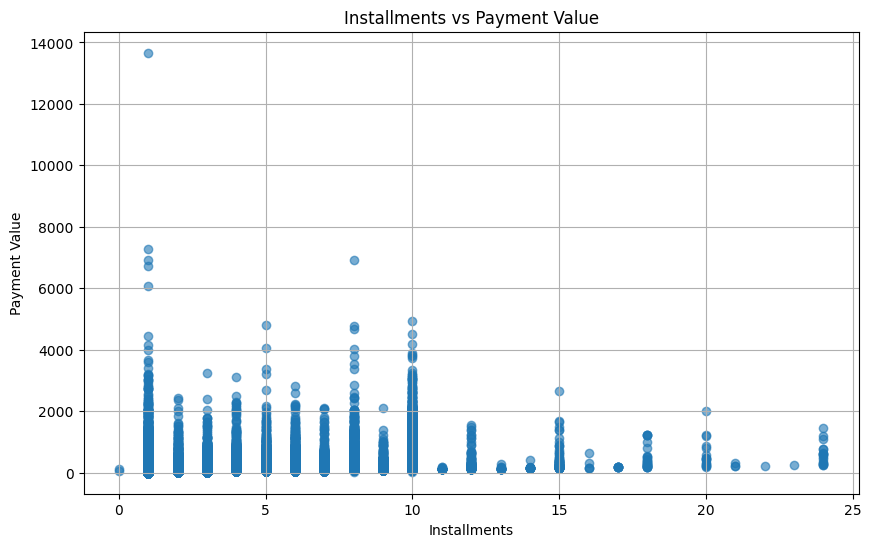

In [30]:
# Relationship between installments and payment value

plt.figure(figsize=(10, 6))
plt.scatter(df['payment_installments'], df['payment_value'], alpha=0.6)
plt.title('Installments vs Payment Value')
plt.xlabel('Installments')
plt.ylabel('Payment Value')
plt.grid(True)
plt.show()


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import pandas as pd

# Load the dataset
df = pd.read_csv('olist_order_payments_dataset.csv')

# Prepare data
X = df[['payment_installments']]
y = df['payment_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Metrics
print("Linear Regression:")
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))


Linear Regression:
RMSE: 193.01060313602017
MAE: 98.91179861044083
R²: 0.11895192708024538


In [37]:
from sklearn.metrics import root_mean_squared_error

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = lr_poly.predict(X_test_poly)

# Métricas atualizadas
print("Polynomial Regression (degree=2):")
print("RMSE:", root_mean_squared_error(y_test_poly, y_pred_poly))
print("MAE:", mean_absolute_error(y_test_poly, y_pred_poly))
print("R²:", r2_score(y_test_poly, y_pred_poly))


Polynomial Regression (degree=2):
RMSE: 192.89461665590247
MAE: 98.95317901904065
R²: 0.12001051099792925


In [39]:
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Metrics
print("Ridge Regression:")
print("RMSE:", root_mean_squared_error(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))


Ridge Regression:
RMSE: 193.01060189439863
MAE: 98.91179504564154
R²: 0.11895193841566676


In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import pandas as pd

# Load the dataset
df = pd.read_csv('olist_order_payments_dataset.csv')

# Prepare data
X = df[['payment_installments']]
y = df['payment_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search for Ridge Regression
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(Ridge(), params, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

# Best model
best_ridge = grid.best_estimator_
y_pred_best = best_ridge.predict(X_test)

# Evaluation metrics
print("Best Ridge Alpha:", grid.best_params_['alpha'])
print("Best Ridge RMSE:", root_mean_squared_error(y_test, y_pred_best))
print("Best Ridge MAE:", mean_absolute_error(y_test, y_pred_best))
print("Best Ridge R²:", r2_score(y_test, y_pred_best))



Best Ridge Alpha: 100
Best Ridge RMSE: 193.01047937658123
Best Ridge MAE: 98.91144218928227
Best Ridge R²: 0.11895305694542846
